In [109]:
from matplotlib import pyplot as plt
plt.style.use('classic')
from sklearn import linear_model
import pandas as pd 
import numpy as np

In [110]:
data = pd.read_csv("HousePrices.csv")
data.shape
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


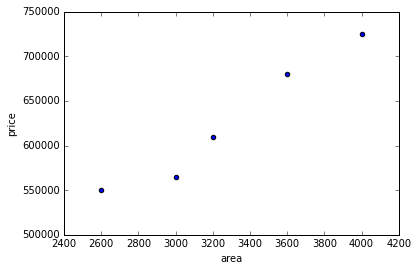

In [112]:
data.plot(kind='scatter', x = "area", y="price")
plt.show()

In [113]:
# Correlation Co-efficient
data.corr()

,area,price
area,1.000000,0.978994
price,0.978994,1.000000


In [114]:
# change to df
area = pd.DataFrame(data["area"])
price = pd.DataFrame(data["price"])
price

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [115]:
#Build linear model
lm = linear_model.LinearRegression()
model = lm.fit(area, price)

In [116]:
model.coef_

array([[135.78767123]])

In [117]:
model.intercept_

array([180616.43835616])

In [118]:
# Model Evaluation
model.score(area, price)

0.9584301138199486

In [119]:
# Predict new value of price
price_new = 567000
price_new = np.array(price_new).reshape(1, -1)
pricePred = model.predict(price_new)
pricePred

array([[77172226.02739727]])

In [120]:
# Predict more values
X = ([672676, 582682])
X = pd.DataFrame(X)
Y = model.predict(X)
Y = pd.DataFrame(Y)
df = pd.concat([X, Y], axis = 1, keys = ['price_new', 'pricePred'])
df

,price_new,pricePred
,0,0
0,672676,9.152172e+07
1,582682,7.930165e+07


No handles with labels found to put in legend.


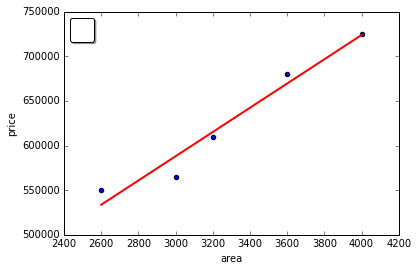

In [128]:
# Visualize the results
data.plot(kind = "scatter", x = 'area', y = "price")
# Regression line
plt.plot(area, model.predict(area), color = "red", linewidth = 2)
plt.legend(loc='upper left',fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.show()